# Extracting files from the zipfile

In [1]:
import zipfile
import os

In [2]:
zip_file_path = 'Vegetables.zip'

In [3]:
extract_to_dir = os.getcwd()

In [4]:
os.makedirs(extract_to_dir, exist_ok=True)

In [5]:
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Checking the extracted files

In [6]:
os.listdir('Vegetable Images')

['test', 'train', 'validation']

In [7]:
data_dir = os.path.join(extract_to_dir, 'Vegetable Images')

# Data Preprocessing

In [8]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
selected_veg = ['Papaya','Pumpkin']

In [10]:
target_size = (64,64)

In [11]:
# empty list to store images and labels

images = []
labels = []

In [12]:
for vegetable in selected_veg:
    folder_path = os.path.join(data_dir, 'train', vegetable)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path).convert('RGB')
            image = image.resize(target_size)
            image = np.array(image) / 255.0
            images.append(image)
            labels.append(1 if vegetable == selected_veg[0] else 0)

In [13]:
images = np.array(images)
labels = np.array(labels)

In [14]:
print(len(images), len(labels))

2000 2000


In [15]:
if len(images)  != len(labels):
    images = images[:len(labels)]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

# Model Building

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [21]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.8289 - loss: 0.3468 - val_accuracy: 0.9875 - val_loss: 0.0332
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9850 - loss: 0.0469 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9957 - loss: 0.0177 - val_accuracy: 0.9900 - val_loss: 0.0434
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9971 - loss: 0.0122 - val_accuracy: 0.9950 - val_loss: 0.0127
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9956 - loss: 0.0117 - val_accuracy: 0.9900 - val_loss: 0.0308
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9925 - val_loss: 0.0197
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9934 - loss: 0.0283 - val_accuracy: 0.9925 - val_loss: 0.0122
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9971 - loss: 0.0054 - val_accuracy: 0.9950 -

# Evaluation

In [22]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)

In [23]:
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)

Test Loss:  0.02317662164568901
Test Accuracy:  0.9950000047683716


In [24]:
predict_img = x_train[34]

In [25]:
prediction = model.predict(np.expand_dims(predict_img, axis=0))
predicted_class = "Papaya" if prediction[0][0] > 0.5 else "Pumpkin"
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: Pumpkin


In [26]:
import matplotlib.pyplot as plt

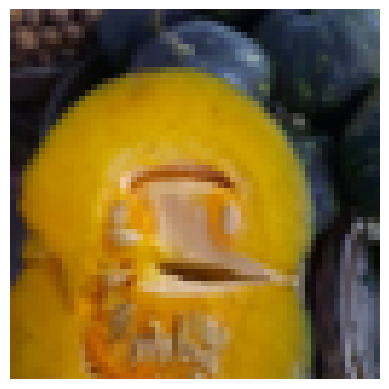

In [27]:
plt.imshow(predict_img)
plt.axis('off')
plt.show()

# Muliticlass Classification

In [28]:
def load_and_preprocess_data(data_dir, target_size=(64, 64)):
    images = []
    labels = []
    vegetable_types = os.listdir(os.path.join(data_dir, 'train'))
    for i, vegetable_type in enumerate(vegetable_types):
        for filename in os.listdir(os.path.join(data_dir, 'train', vegetable_type)):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(data_dir, 'train', vegetable_type, filename)
                image = Image.open(image_path).convert('RGB')
                image = image.resize(target_size)
                image = np.array(image) / 255.0
                images.append(image)
                labels.append(i)
    return np.array(images), np.array(labels)

In [29]:
images, labels = load_and_preprocess_data(data_dir)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [31]:
num_classes = len(set(labels))
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.3707 - loss: 1.8801 - val_accuracy: 0.7133 - val_loss: 0.8722
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.7624 - loss: 0.7203 - val_accuracy: 0.8557 - val_loss: 0.4463
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.8806 - loss: 0.3854 - val_accuracy: 0.8813 - val_loss: 0.3653
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9185 - loss: 0.2539 - val_accuracy: 0.9067 - val_loss: 0.3138
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9530 - loss: 0.1589 - val_accuracy: 0.9247 - val_loss: 0.2579
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9673 - loss: 0.1114 - val_accuracy: 0.9453 - val_loss: 0.1981
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9794 - loss: 0.0709 - val_accuracy: 0.9293 - val_loss: 0.2526
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9845 - loss: 0.0528 - 

In [34]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.30890658497810364
Test Accuracy: 0.921999990940094


In [46]:
vegetable_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Raddish', 'Tomato']

predict_img = x_train[2874]
prediction = model.predict(np.expand_dims(predict_img, axis=0))
predicted_class = np.argmax(prediction)
predicted_vegetable = vegetable_names[predicted_class]
print("Predicted class:", predicted_vegetable)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: Pumpkin


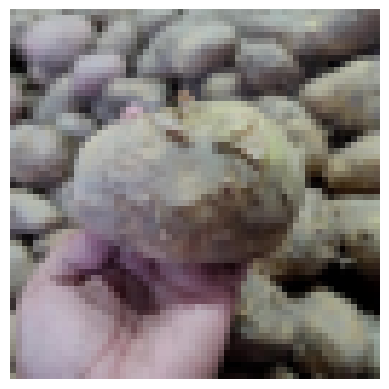

In [47]:
import matplotlib.pyplot as plt
plt.imshow(predict_img)
plt.axis('off')
plt.show()